In [13]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [14]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [15]:
#fix random seed for reproductibility
np.random.seed(7)

In [16]:
#uploading data
from pandas import DataFrame, read_csv
import pandas as pd 
 
file = r'XRPBTC_1min_7days_binance_data_021018_extrema.csv'
df = pd.read_csv(file)
print(df)

                    Unnamed: 0     close   rsi (14)          macd  \
0     Fri Feb  9 04:59:15 2018  0.000093  39.552671 -8.142017e-08   
1     Fri Feb  9 05:01:15 2018  0.000094  60.945825 -2.011479e-08   
2     Fri Feb  9 05:02:15 2018  0.000094  57.866328  2.016971e-08   
3     Fri Feb  9 05:07:15 2018  0.000095  63.785522  1.845568e-07   
4     Fri Feb  9 05:08:15 2018  0.000095  62.932807  2.018115e-07   
5     Fri Feb  9 05:11:15 2018  0.000095  61.607449  2.434670e-07   
6     Fri Feb  9 05:12:15 2018  0.000095  65.544728  2.582762e-07   
7     Fri Feb  9 05:15:15 2018  0.000095  57.614071  2.309364e-07   
8     Fri Feb  9 05:16:15 2018  0.000095  60.243410  2.259963e-07   
9     Fri Feb  9 05:19:15 2018  0.000095  55.136093  1.779137e-07   
10    Fri Feb  9 05:20:15 2018  0.000095  57.566400  1.696518e-07   
11    Fri Feb  9 05:22:15 2018  0.000095  55.384774  1.449558e-07   
12    Fri Feb  9 05:32:15 2018  0.000094  44.783631  3.370309e-08   
13    Fri Feb  9 05:42:15 2018  0.

In [17]:
rsi = df['rsi (14)'].values
#scaling
scaler = MinMaxScaler(feature_range = (0,1)) #scale variable in 0s and 1s
scaled_train_rsi = scaler.fit_transform((rsi).reshape(-1,1)) #converting data age between 16 and 100 to 0s and 1s

<class 'numpy.ndarray'>
[39.55267122 60.94582476 57.86632794 ... 46.74674234 44.34071718
 44.57853059]
3486


In [18]:
macd = df['macd'].values
#scaling
scaler = MinMaxScaler(feature_range = (0,1)) #scale variable in 0s and 1s
scaled_train_macd = scaler.fit_transform((macd).reshape(-1,1)) #converting data age between 16 and 100 to 0s and 1s

<class 'numpy.ndarray'>
[-8.14201706e-08 -2.01147855e-08  2.01697099e-08 ...  1.88888369e-08
 -1.55033429e-08 -3.35729674e-08]
[[0.39812105]
 [0.41212552]
 [0.42132802]
 ...
 [0.42103542]
 [0.41317895]
 [0.40905116]]


In [19]:
macd_sig = df['macd signal'].values
#scaling
scaler = MinMaxScaler(feature_range = (0,1)) #scale variable in 0s and 1s
scaled_train_macd_sig = scaler.fit_transform((macd_sig).reshape(-1,1)) #converting data age between 16 and 100 to 0s and 1s

<class 'numpy.ndarray'>
[-1.11577123e-08 -2.50059088e-08 -1.59707851e-08 ...  7.73743666e-08
  3.44481162e-08  2.08438995e-08]
[[0.40589735]
 [0.40222455]
 [0.40462083]
 ...
 [0.42937769]
 [0.41799286]
 [0.41438477]]


In [20]:
#creating input matrix
X = np.hstack((scaled_train_rsi, scaled_train_macd))
X = np.hstack((X, scaled_train_macd_sig))

(3486, 3)
[[0.3454704  0.39812105 0.40589735]
 [0.60305171 0.41212552 0.40222455]
 [0.56597346 0.42132802 0.40462083]
 ...
 [0.43208962 0.42103542 0.42937769]
 [0.4031202  0.41317895 0.41799286]
 [0.40598356 0.40905116 0.41438477]]


In [21]:
#Creating target array
train_labels = df['Y'].values

<class 'numpy.ndarray'>
[1 0 1 ... 1 1 0]
3486


In [32]:
#Sequential is a model of stack of layers
#Dense (number of nodes/output, shape of input, activation function) #A layer with its info
model = Sequential([
    Dense(16, input_shape = (3,), kernel_initializer='uniform', activation = "relu"),
    Dense(16, kernel_initializer='uniform', activation = "relu"),
    Dense(2, kernel_initializer='uniform', activation = "softmax")
])

In [33]:
#showing summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                64        
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
Total params: 370
Trainable params: 370
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Train a keras model
#model.compile(optimizer(learning rate), loss function/cost function, metrics to judge to accuracy )
model.compile(Adam(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])

In [46]:
#fitting data
#model.fit(samples, labels, validation set, batch_size = how many samples grow together at a time while training, epoch = iteration, suffle = Ture to make it random, verbose = how much data to print while training )
history = model.fit(X, train_labels, validation_split = 0.1, batch_size = 10, epochs = 150, shuffle = True, verbose = 2)

Train on 3137 samples, validate on 349 samples
Epoch 1/150
 - 0s - loss: 0.6455 - acc: 0.6516 - val_loss: 0.6524 - val_acc: 0.6447
Epoch 2/150
 - 0s - loss: 0.6213 - acc: 0.6701 - val_loss: 0.5916 - val_acc: 0.7106
Epoch 3/150
 - 0s - loss: 0.6185 - acc: 0.6548 - val_loss: 0.7370 - val_acc: 0.6275
Epoch 4/150
 - 0s - loss: 0.6101 - acc: 0.6697 - val_loss: 0.5624 - val_acc: 0.7249
Epoch 5/150
 - 0s - loss: 0.6194 - acc: 0.6653 - val_loss: 0.5891 - val_acc: 0.6848
Epoch 6/150
 - 0s - loss: 0.6074 - acc: 0.6707 - val_loss: 0.6054 - val_acc: 0.6533
Epoch 7/150
 - 0s - loss: 0.6079 - acc: 0.6793 - val_loss: 0.6169 - val_acc: 0.6390
Epoch 8/150
 - 0s - loss: 0.6013 - acc: 0.6742 - val_loss: 0.5837 - val_acc: 0.6819
Epoch 9/150
 - 0s - loss: 0.5975 - acc: 0.6835 - val_loss: 0.5931 - val_acc: 0.6676
Epoch 10/150
 - 0s - loss: 0.5960 - acc: 0.6815 - val_loss: 0.5907 - val_acc: 0.6648
Epoch 11/150
 - 0s - loss: 0.6037 - acc: 0.6809 - val_loss: 0.5934 - val_acc: 0.6590
Epoch 12/150
 - 0s - loss: 

Epoch 97/150
 - 0s - loss: 0.5710 - acc: 0.6991 - val_loss: 0.5622 - val_acc: 0.7049
Epoch 98/150
 - 0s - loss: 0.5697 - acc: 0.7051 - val_loss: 0.5583 - val_acc: 0.7020
Epoch 99/150
 - 0s - loss: 0.5658 - acc: 0.6978 - val_loss: 0.5587 - val_acc: 0.7049
Epoch 100/150
 - 0s - loss: 0.5832 - acc: 0.6911 - val_loss: 0.5679 - val_acc: 0.6905
Epoch 101/150
 - 0s - loss: 0.5737 - acc: 0.6962 - val_loss: 0.5628 - val_acc: 0.7049
Epoch 102/150
 - 0s - loss: 0.5698 - acc: 0.7026 - val_loss: 0.5801 - val_acc: 0.6991
Epoch 103/150
 - 0s - loss: 0.5709 - acc: 0.6968 - val_loss: 0.5594 - val_acc: 0.7077
Epoch 104/150
 - 0s - loss: 0.5751 - acc: 0.6988 - val_loss: 0.6331 - val_acc: 0.6361
Epoch 105/150
 - 0s - loss: 0.5759 - acc: 0.6988 - val_loss: 0.5638 - val_acc: 0.7020
Epoch 106/150
 - 0s - loss: 0.5734 - acc: 0.6984 - val_loss: 0.5581 - val_acc: 0.7049
Epoch 107/150
 - 0s - loss: 0.5745 - acc: 0.7093 - val_loss: 0.5542 - val_acc: 0.7307
Epoch 108/150
 - 0s - loss: 0.5720 - acc: 0.6997 - val_lo

In [47]:
#checking model keys
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


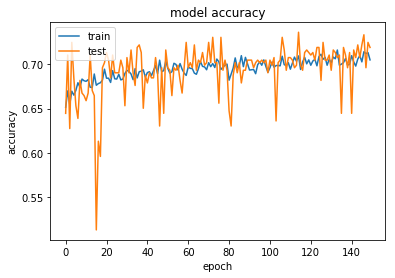

In [49]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

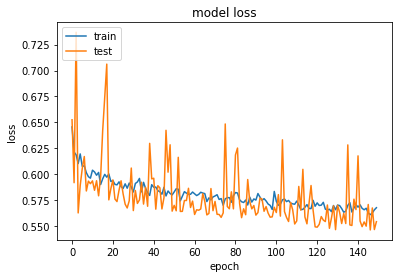

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()